# Assignment 2a Due 9/8

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [104]:
#your import cell
import numpy as np
import math
import scipy as sc
from scipy import integrate
import matplotlib as mpl

Now we can define our integration algorithms

In [204]:
#define midpoint rule
def midpointintg(function,xmin,xmax,dxcount):
    dxarray=np.linspace(xmin,xmax, 2*dxcount+1) #everyother point given from linsapce is used to go into function
    placeholder =1
    area = 0
    while placeholder < len(dxarray):
        y = function(dxarray[placeholder])
        dx = dxarray[placeholder + 1]-dxarray[placeholder - 1] #dx is equidistant around x, +/_ one linspace interval
        area = area + (y*dx)
        placeholder = placeholder + 2
    return area
                    
testfun = lambda x: 2*x
midpointintg( testfun ,0,2,10) 


4.0

In [205]:
#define trapazoidal rule
def trapintg(function,xmin,xmax,dxcount):
    dxtrap=np.linspace(xmin,xmax,dxcount+1) #
    tarea = 0
    for i in range(dxcount):#array has i+1 elements
        yone = function(dxtrap[i])
        ytwo= function(dxtrap[i+1])#number of points including start and finish is one more than the dx count
        tdx = dxtrap[i+1]-dxtrap[i] 
        tarea = tarea + (1/2*tdx*(yone+ytwo))
    return tarea
                    
testfuntwo = lambda x: x**2
trapintg(testfuntwo ,0,2,20)


2.6700000000000004

In [68]:
#define simpson's rule 
def simpsons(function,xmin,xmax,dxcount):
    sarea = (2*midpointintg(function,xmin,xmax,dxcount)+trapintg(function,xmin,xmax,dxcount))/3 #using weighted average of previous values
    return sarea

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [288]:
#exact solution to the integral
exact = (1/4)*math.sqrt(2)
print(exact)

0.3535533905932738


In [287]:
#solve the integral using your integration functions
function= lambda x: 2*(4+x**2)**(-3/2)
am=midpointintg(function,0,2,6)
print("midpoint",am)
at=trapintg(function,0,2,6)
print("trapezoid",at)
asi=simpsons(function,0,2,6)
print("simpson", asi)

midpoint 0.35385997545853143
trapezoid 0.35293994641413146
simpson 0.35355329911039807


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [286]:
#scipy integration
def arraycrea(n):
    xar= np.array(range(n))
    return xar
def arraycreate(n):
    yl=list()
    for i in range (n):
        yv=2*(4+i**2)**(-3/2)
        yl.append(yv)
    return yl
fox=np.array(arraycreate(6))
sci_trap = sc.trapz([fox])
sci_simp = integrate.simps([fox])
print('sci_simp yields:',sci_simp)
print('sci_trap yields:', sci_trap)

sci_simp yields: [0.45857696]
sci_trap yields: [0.463707]


# Question
How do scipy integrals compare to yours? Support your answer. 

In [284]:
#print the numerical values
def pdif(a,e):
    dif=100*((a-e)/e)
    return dif
print("trapmethod:" , pdif(at,sci_trap))
print("simpsons method:" , pdif(at,sci_simp))

trapmethod: [-23.88729366]
simpsons method: [-23.03583117]


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [285]:
#numerical comparisons
print("all answers given as a percent")
print("midpoint",pdif(am,exact))
print("Trapezoid",pdif(at,exact))
print("simposon",pdif(asi,exact))

all answers given as a percent
midpoint 0.08671529489313702
Trapezoid -0.17350821558038287
simposon -2.58752647134114e-05


# Question
Which method provides the best approximation to the exact solution?

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

Text(0, 0.5, 'percent difference')

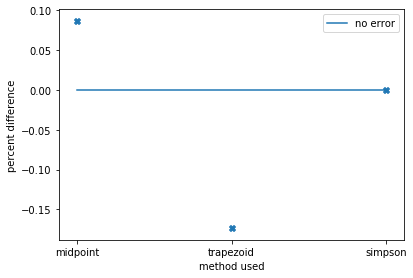

In [283]:
#plot 
#i dont understand what this is asking, if its asking to present a graph showing % difference between methods
#a scatter plot doesn't make sense
import matplotlib.pyplot as mpl

xv=("midpoint","trapezoid","simpson")
yv=(pdif(am,exact),pdif(at,exact),pdif(asi,exact))
yp=(0,0,0)
fig= mpl.figure()

ax=fig.add_axes([0.8,0.8,0.8,0.8])
ax.plot(xv,yp, label="no error")
ax.scatter(xv,yv,marker='X')
ax.legend()
ax.set_xlabel('method used')
ax.set_ylabel('percent difference')


Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [282]:
#solve integral above
from sympy import limit

functione = lambda x: math.exp(-1*x**2)  
quadintg =integrate.quad(functione,-np.inf,np.inf)
print(quadintg)

(1.7724538509055159, 1.4202636781830878e-08)


# Question
If you square your solution, does the resulting number have any special meaning?